# Startup Success Analysis 

## 1. Introduction

AirBnB, Amazon, Facebook, Uber... Startups solve our problems, improve our lives, and even transform our societies. Founders of successful startups like Mark Zuckerberg, Jeff Bezos, and Elon Musk have become household names. Have you ever wondered how to build a successful startup yourself? Do you know why some startups succeed and why others fail? This analysis is designed to extract valuable insights from a startup dataset (https://www.kaggle.com/ajaygorkar/startup-analysis) by using various data mining tactics. 

The goal of this analysis is to help entrepreneurs understand when, where, and how to attract investment and achieve success. Specially, I analyzed (1) the status of the startups; (2) the sartup ecosystems around the world; (3) the economic environment from 1997 to 2013; (4) who were the founders and co-founders of the startups (e.g., major in college, higherst degree, skills); (5) what factors impacted the amount of funding received by startups; (6) what factors affected their status of success or failure. I also conducted a principle component analysis of the skills of the founders & co-founders and generated a multiple linear regression model to test the relaionship between a number of characteristics of the founders & co-founders and the amount of investment they attracted. Finally, I trained a logistic regression model to help us predict startup success based on the skill sets of their founders and co-founders.

## 2. Data Importation and Preliminary Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import plotly.express as px 
import plotly.figure_factory as ff
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn import decomposition
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree

import graphviz 

import statsmodels.api as sm
from sklearn.metrics import classification_report
%matplotlib inline
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the initial dataset using the Pandas library
df = pd.read_csv('startup2.csv', 
                 names = ["Name", "Status", "Year", 'Age', "IntAct", "Description", "Industry", 
                          "Focus", "Investors", "EmployeeC", "TeamSize", "FoundingAmount", "Country", 
                          "Continent", "NInvesterSeed", "NInvestersAngel", "NCofounders", "NAdvisors", "TeamSizeS",
                          "TeamSizeA", "Fund", "NReInversts", "NSalesS", "WT", "SP", "WS", "WSS", "Big5", "ECon", 
                          "Product", "PublicD", "ConsumerD", "StructuredD", "Sub", "Cloud", "Local", "Linear", 
                          "Capital", "NPartners", "CrowdS", "CrowdF", "Machine", "Predictive", "Speech", "Presc",
                          "BigD", "Cross", "Owns", "Aggre", "Online", "B2C", "Forum", "AveY", "Expo", "Breadth", 
                          "Ed", "YEd", "Spe", "RelEd", "RelEx", "DeTier", "Renowned", "ExS", "Ex100", "Ex500", 
                          "Ex1000", "Top", "Rec", "Res", "Skills", "Team", "Dif", "Pricing", "Localisation", "Time",
                          "Employee", "Long", "Patent", "Barriers", "Awards", "History", "Legal", "Client", "Google",
                          "Technical", "Solutions", "Global", "Trend", "Disrupt", "Competition", "EmployeeY", "Round",
                          "Survival", "Time1", "AvgT", "Gartner", "TimeM", "Entre", "Ope", "Eng", "Mark", "Lead", 
                          "DS", "BS", "PM", "Sales", "Domain", "Law", "Con", "Fin", "Inv", "RenownS"],
                skiprows = [0],
                index_col = "Name")

### 2.1 Status of All Startups

In [4]:
# Check the status of the startups (success vs. failed)
values = df.Status.value_counts()
labels = values.index
colors = ['EC6B56', '47B39C']
trace = go.Pie(labels=labels, 
               values=values,
                marker=dict(colors=colors),
               pull=[0, 0.1] )
layout = go.Layout(title='Status of All Startups')
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

Among the startups created between 1997 and 2013, 64.6% were still successful when data were collected.

### 2.2 Status of Data-Related Startups

In [5]:
# Find all the unique industrial focus of the startups
df.Focus.unique()

array(['operation', 'Marketing, sales', 'operations', 'Marketing & Sales',
       'ananlytics', 'Research', 'Computing', 'Marketing',
       'Sales, marketing', 'Marketing \nsales', 'Technology',
       'marketing, sales', 'Data Manangement', 'Solution providing',
       'Social Media', 'targeted marketing', 'Community Betterment',
       'Web Ananlytics', 'Strategy', 'Bug fix', 'Data Integration',
       'malware protection', 'Ananlytics', 'Social Media optimization',
       'Database Manangement', 'technology', 'Operations', 'Sales',
       'Risk', 'Marketing, Web Ananlytics',
       'Strategy, Operations, Financial Planning', 'Data Collection',
       'marketiing', 'marketing', 'sales', 'e-learning',
       'software service', 'mobile app', 'application', 'ananlytic',
       'software ', 'SOCIAL MEDIA', 'SOCIAL MEDIA manangement',
       'OPERATIONS', 'MARKETING', 'PERSOnanL APPS', 'consumer behaviour',
       'customer servce', 'CUSTOMER SERVICE', 'APP REVENUE',
       'intellectua

In [6]:
# Subset data-related startups
data_ind = 'analytics', 'Research', 'Computing',  'Technology', 'Data Management', 'Solution providing',  \
       'Web Analytics', 'Strategy', 'Bug fix', 'Data Integration',  'malware protection', 'Analytics', \
       'Database Management', 'technology', 'Web Analytics', 'Data Collection', 'e-learning', 'software service',\
       'mobile app', 'application', 'analytic', 'software ',  'PERSONAL APPS',  'APP REVENUE', \
       'intellectual property analysis and visualisation', 'data visualization', 'research',  'Computing, training',\
       'data collection ', 'IT & Sales', 'web', 'sale', 'social network', 'consumer web', 'writing blog', \
       'curated web', 'Recommendation ', 'Development Tool', 'Tool', 'Inventory management', \
       'Search EnginenOptimization','Information management', 'Social media analytics',\
       'Data Visualization, Content Marketing, Presentations', 'analtics', 'elearning', 'PHONE INTELLIGENCE',\
       'DASHBOARDS', 'VIDEO STREAMING', 'PAYMENT', 'software', 'networking', 'wireless', 'search', 'conssumer web',\
       'online music','cloud computing', 'Music intelligece', 'Location based service', 'SOCIAL TV ANALYTICS',\
       'Data driven applications', 'IPHONE APPS', 'TECHNOLOGY', 'NETWORK OPTIMIZATION', 'PRIVACY', \
       'TARGETING OPTIMIZE', 'MAIL REPORTS', 'big data analytics',  'METRICS', 'PRICING', 'ANALYTICS', \
       'mobile app development', 'revenue maximization', 'social media analytics',  'customer analytics', \
       'analytics crowdsourcing', 'app', 'ecommerce',  'Server Design',  'Search Engine'

In [7]:
# Create a new column called "Data"
df["Data"] = df["Focus"].map(lambda x: 1 if x in data_ind else 0)

In [8]:
# Calculate the success rate of data-related startups
values = df[df.Data == 1].Status.value_counts()
success, failed = df[df.Data == 1].Status.value_counts()
success_rate = success/(success + failed)
success_rate

0.6982758620689655

In [9]:
# Compare the success rate of all startups and data-related startups
startupsuccess_df = pd.DataFrame({'startuptypes': ['Data Related Startups', 'Startups in General'],
                                'successfulrate': [69.8, 64.6]})
fig = px.bar(startupsuccess_df, x='startuptypes', y='successfulrate', color='successfulrate',
            labels={'successfulrate':'Successful Rate (%)', 'startuptypes': "Startup Types"})
fig.show()

Good news for Data Science majors: The success rate for data-related startups is higher than average (69.8% vs.64.6%)!

### 2.3 The Startup Ecosystems around the World

In [10]:
# Let's find out the top 10 entrepreneur friendly countries
values = df['Country'].value_counts().sort_values(ascending=False).head(10)
labels = values.index
trace = go.Bar(y=values, x=labels)
layout = go.Layout(title='Top 10 Entrepreneur Friendly Countries', 
                   xaxis={'title':'Country'},
                  yaxis={'title' : 'Number of Startups'})
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [11]:
# Use plotly express to plot the locations of the startups
countrynames = df['Country'].value_counts()
countrynames_df = pd.DataFrame({'country_name': countrynames.keys(),
                           'num_startups': countrynames.values,})
fig = px.choropleth(countrynames_df, 
                    locations="country_name",  
                    color="num_startups",  
                    locationmode = 'country names', 
                    color_continuous_scale='viridis')
fig.update_layout(
    title_text = 'Countries of the Startups')

fig.show()

The United States is the most entrepreneur friendly country on this planet, followed by United Kingdom and India.

### 2.4 The Economic Environment of Startups (1997-2013): How did the number of startups and the amount of funding they received change over time?

In [12]:
# Find out how many startups were created per year
num_year = df.Year.value_counts()
num_year_df = pd.DataFrame(num_year)
num_year_df.index = num_year_df.index[::-1]
num_year_df.index.name = "Year"
num_year_df.rename(columns = {'Year':'Number'}, inplace = True) 

# Find out the amount of investment poured into startups per year
year_funding_df = df[['Year', 'FoundingAmount']]
year_funding_df = year_funding_df.groupby(['Year']).sum()
year_funding_df.reset_index(inplace = True)

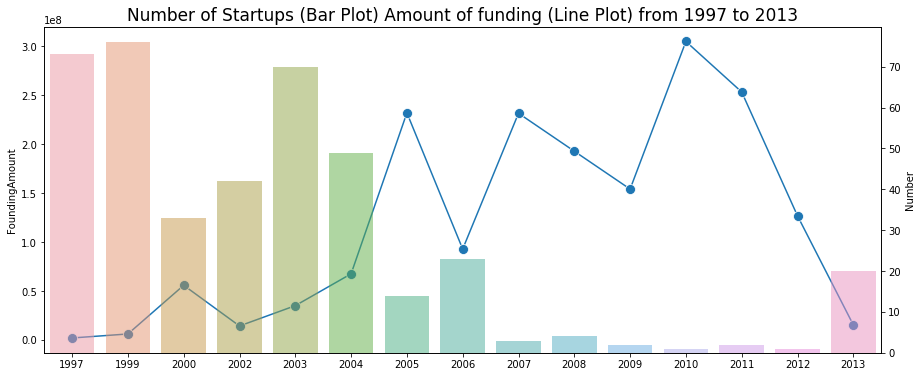

In [13]:
# Use Seaborn to plot both number of startups and amount of investment together
fig, ax = plt.subplots(figsize=(15,6))
g = sns.lineplot(x=year_funding_df.index,  y=year_funding_df.FoundingAmount, data=year_funding_df, ax=ax, 
                 marker='o', markersize=10)
ax2 = ax.twinx()
g = sns.barplot(x=num_year_df.index.astype('int'),  y=num_year_df.Number, data=num_year_df, ax=ax2, alpha=.5)
ax.set_title('Number of Startups (Bar Plot) Amount of funding (Line Plot) from 1997 to 2013', fontsize = 17)
plt.show()

As can be seen here, it is very interesting that during years when more startups were created, the amount of money invested in startups were low. However, when the number of startups were scarce, the amount of funding were hefty. Specifically, after (and even shortly before) the 2008 financial crisis, the number of new startups plumbed, while investment in startups soured.

## 3. Investment

### 3.1 Amount of Funding Received by Startups

In [14]:
# Explore the amount of funding received by startups by creating a news dataframe
funding_df = df[["FoundingAmount"]].dropna()
funding_df = funding_df.reset_index()

In [15]:
# Top 10 investments
funding_df.FoundingAmount.sort_values(ascending = False).head(10)

277    77000000.0
100    62500000.0
280    55000000.0
148    45000000.0
113    43000000.0
193    42000000.0
14     41000000.0
92     35000000.0
130    30600000.0
182    30000000.0
Name: FoundingAmount, dtype: float64

In [16]:
# Lowest 10 investments
funding_df.FoundingAmount.sort_values(ascending = False).tail(10)

128    20000.0
300    18000.0
303    18000.0
304    18000.0
167    18000.0
190    15000.0
297    12000.0
305    12000.0
53     10000.0
200    10000.0
Name: FoundingAmount, dtype: float64

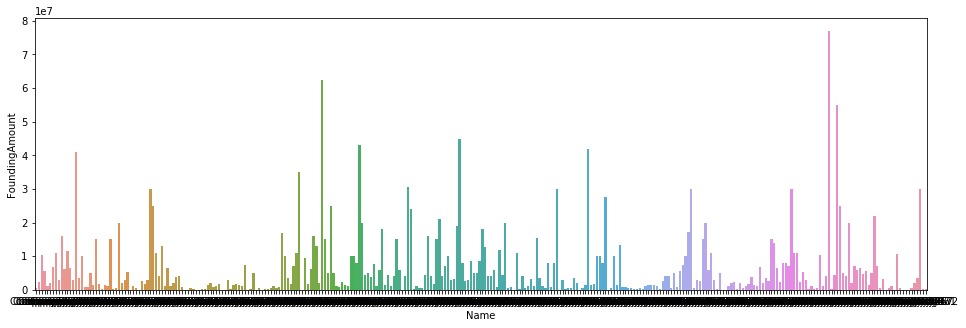

In [17]:
# Plot the variations in the amount of money invested in startups
plt.figure(figsize = (16,5))
ax = sns.barplot(x = "Name", y = "FoundingAmount", data = funding_df)
plt.show()

The differences among the fundings invested in startups were enormous, with some startups received as high as 77 million dollars while others received as low as 10 thousand dollars.

### 3.2 Whether successful startups received more funding than failed startups?

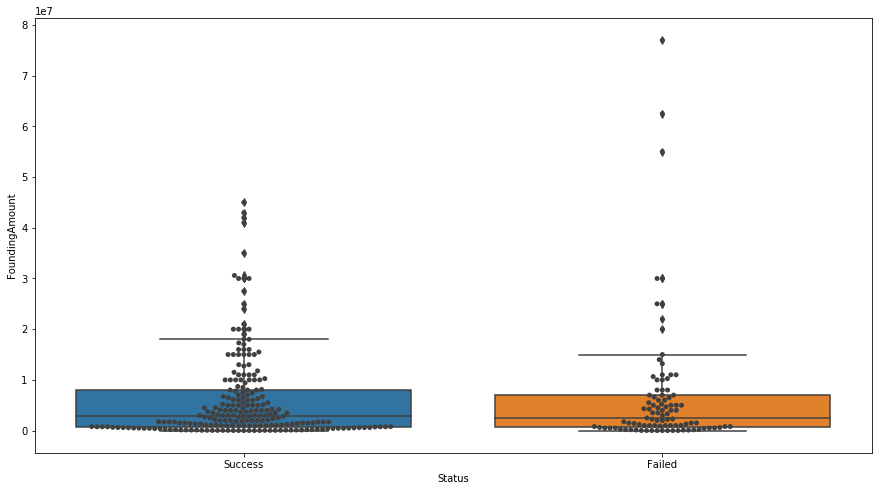

In [18]:
# Subset the dataset into two dataframes
success_df = df[df.Status == "Success"]
failed_df = df[df.Status == "Failed"]

# Plot the differences
plt.figure(figsize = (15,8))
ax = sns.boxplot(x="Status", y="FoundingAmount", data=df)
ax = sns.swarmplot(x="Status", y="FoundingAmount", data=df, color=".25")

It is very interesting that although the median investment on successful startups was slightly higher than that of the failed startups, the mean investment on failed startups was actually higher than that of the successful startups, due to quite a few extremely large investments on failed startups. It seems that money is not a determining factor of the life and death of a startup.

## 4. Who were the entrepreneurs?

### 4.1 What were the majors of the founders & co-founders of startups?

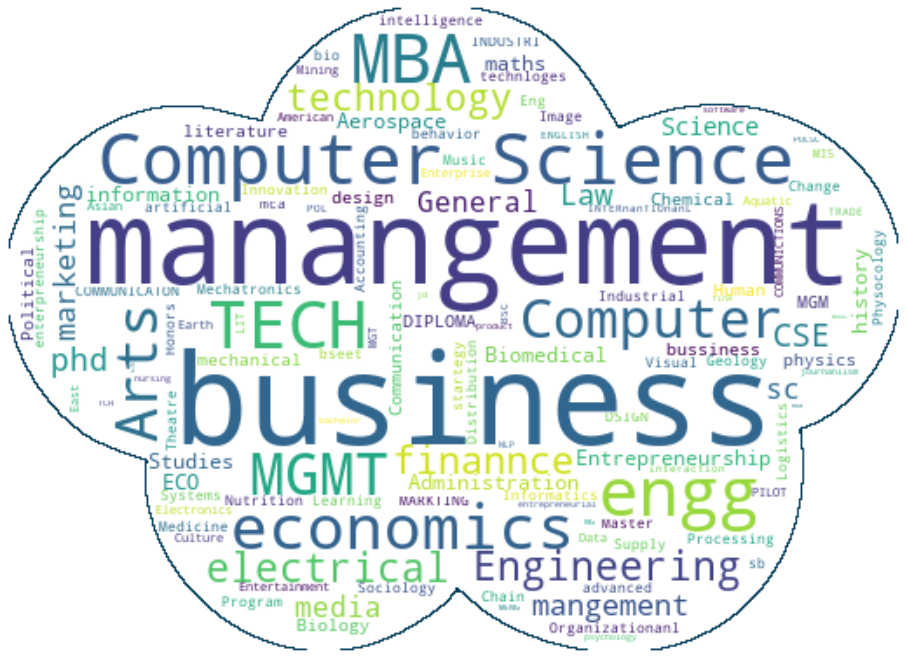

In [19]:
# Use word cloud to show the most frequent majors of founders & co-founders of startups
text = df.Spe.values
cleanedList = [x for x in text if str(x) != 'nan']
mask1 = np.array(Image.open("mask-cloud.png"))
wordcloud = WordCloud(
    background_color = 'white',
    mask = mask1,
    stopwords = STOPWORDS,
    contour_width = 1,
    contour_color = '#033C5A').generate(' '.join(cleanedList))
plt.figure(figsize = (16, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Not surprisingly that many entrepreneurs majored in business management and/or computer science.

### 4.2 Did the years of education of the founders affect the amount of funding they received?

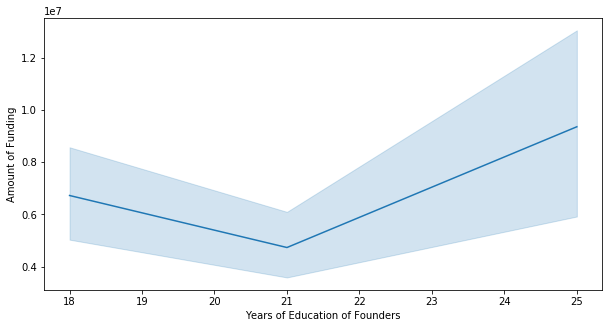

In [20]:
# Plot the relationship between years of education and amount of funding
plt.figure(figsize = (10,5))
ax = sns.lineplot(x="YEd", y="FoundingAmount", data=df)
ax.set(xlabel='Years of Education of Founders', ylabel='Amount of Funding');

Whether more education leads investors to trust (and invest in) you more? This is a tricky question based on the data here. It seems that there was not a linear relationship between years of education and amount of money the founders were able to get. However, after 21 years of school (after graduate school, approximately), more education tends to help you attract more investment.

### 4.3 Did the quality of the colleges the founders attended affect the amount of funding they received?

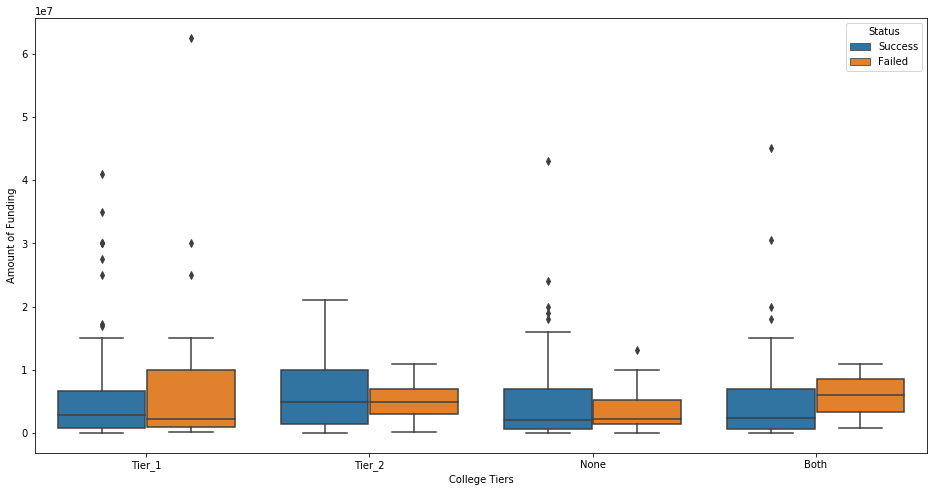

In [21]:
# Plot the differences in funding amount across college tiers
plt.figure(figsize = (16,8))
ax = sns.boxplot(x="DeTier", y="FoundingAmount", data=df, hue="Status")
ax.set(xlabel='College Tiers', ylabel='Amount of Funding');

It is counterintuitive to see that although entrepreneurs who attended tier 1 colleges were able to attract more investment, their success rate was lower than entrepreneurs attended tier 2 or even worse colleges (or no college at all).

### 4.4 Did the founder's highest degree affect the amount of funding they received?

<Figure size 1440x648 with 0 Axes>

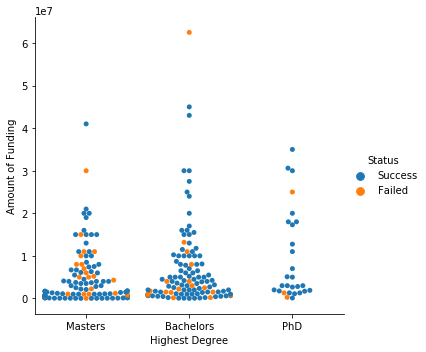

In [22]:
# Plot the differences in funding amount across highest degrees
plt.figure(figsize = (20,9))
ax = sns.catplot(x="Ed", y="FoundingAmount", data=df, hue="Status", kind = 'swarm')
ax.set(xlabel='Highest Degree', ylabel='Amount of Funding');

Based on the insights extracted from this dataset, if I were to invest in startups, I would invested in someone who has a doctoral degree. It seems that founders with a Ph.D. had a much higher success rate. But this graph also suggests that entrepreneurs' highest degree beared little influence on their ability to attract investment.

### 4.5.1 What are the skill sets of the entrepreneurs?

In [23]:
# Subset the skills of the founders & co-founders into a new dataframe
founderskill_df = df[['Entre', 'Ope', 'Eng', 'Mark', 'Lead', 'DS', 'BS', 'PM',
       'Sales', 'Domain', 'Law', 'Con', 'Fin', 'Inv']]
founderskill_c_df = pd.DataFrame(founderskill_df.apply(lambda column: (column != 0).sum()))
founderskill_c_df.reset_index(inplace=True)
founderskill_c_df.iloc[1] 
founderskill_c_df.rename(columns = {'index':'Skills', 0:'Frequency'}, inplace = True) 
founderskill_c_df.Frequency.values
data = founderskill_c_df
labels = ['Skill in Entrepreneurship', 'Skill in Operations', 'Skill in Engineering', 'Skill in Marketing', 
          'Skill in Leadership', 'Skill in Data Science', 'Skill in Business Strategy', 'Skill in Product Management',
          'Skill in Sales', 'Skill in Domain Knowledge', 'Skill in Law', 'Skill in Consulting', 'Skill in Finannce', 
          'Skill in Investment']
values = [341, 189, 329, 296, 214, 272, 354, 260, 239, 255,  69,  93, 112,
       149]

# Plot the skills
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

### 4.5.2 Which skills were more likely to attract investment?

In [24]:
# Analyse the relationships between skills of the entrepreneurs and amount of investment they got
skill_inv_df = df[['Status', 'FoundingAmount', 'Entre', 'Ope', 'Eng', 'Mark', 'Lead', 'DS', 'BS', 'PM',
       'Sales', 'Domain', 'Law', 'Con', 'Fin', 'Inv']]
corr = skill_inv_df.corr()

# Draw the correlation table among the variables
corr.style.background_gradient(cmap='viridis').set_precision(2)

,FoundingAmount,Entre,Ope,Eng,Mark,Lead,DS,BS,PM,Sales,Domain,Law,Con,Fin,Inv
FoundingAmount,1.00,-0.04,-0.08,0.03,-0.09,0.01,0.07,0.05,-0.07,-0.03,-0.07,-0.06,-0.02,-0.06,-0.02
Entre,-0.04,1.00,0.04,-0.16,0.14,0.20,-0.01,0.27,0.18,0.21,0.10,-0.01,0.05,0.01,0.21
Ope,-0.08,0.04,1.00,-0.06,-0.02,0.29,0.03,0.24,0.03,0.16,0.09,-0.04,0.14,0.09,0.02
Eng,0.03,-0.16,-0.06,1.00,-0.25,-0.12,0.07,-0.09,0.12,-0.15,-0.07,-0.02,-0.11,-0.13,-0.17
Mark,-0.09,0.14,-0.02,-0.25,1.00,-0.02,0.04,0.13,0.05,0.08,0.12,-0.05,-0.08,-0.06,-0.03
Lead,0.01,0.20,0.29,-0.12,-0.02,1.00,-0.00,0.24,0.02,0.21,0.09,0.08,0.15,0.08,0.10
DS,0.07,-0.01,0.03,0.07,0.04,-0.00,1.00,-0.02,-0.02,-0.06,-0.01,-0.02,0.15,0.01,-0.05
BS,0.05,0.27,0.24,-0.09,0.13,0.24,-0.02,1.00,0.21,0.31,0.16,0.19,0.20,0.00,0.23
PM,-0.07,0.18,0.03,0.12,0.05,0.02,-0.02,0.21,1.00,0.18,0.07,-0.04,0.13,-0.08,-0.02
Sales,-0.03,0.21,0.16,-0.15,0.08,0.21,-0.06,0.31,0.18,1.00,0.09,-0.01,0.07,0.09,0.12


The correlation table shows that amount of funding was only weakly related to the skills of entrepreneurs. Among all the skills, I am particularly interested in the skill in Data Science. Below I ploted the relationships between amount of funding and Data Science and Domain knowledge.

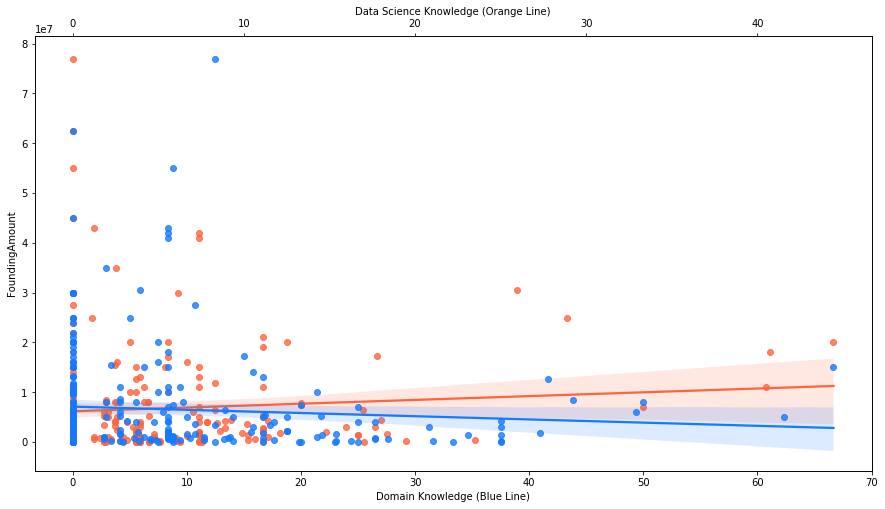

In [25]:
# Plot the relationships between amount of funding and Data Science and Domain knowledge.
fig, ax = plt.subplots(figsize=(15,8))
g = sns.regplot(x = 'DS', y = 'FoundingAmount', data = skill_inv_df, ax=ax, color = '#ff643d')
ax2 = ax.twiny()
g = sns.regplot(x = 'Domain', y = 'FoundingAmount', data = skill_inv_df, ax=ax2, color='#147aff')
ax.set_xlabel('Domain Knowledge (Blue Line)')
ax2.set_xlabel('Data Science Knowledge (Orange Line)')
plt.show()

The above graph indicates that entrepreneurs skilled at data science were more likely to attract more funding, whereas entrepreneurs who had lots of domain knowledge tended to attract less funding. This contrast is very interesting. Common sense usually goes that the more knowledgeable you are, the more capable you are -- which usually means that the more funding you should be able to attract. Further analysis might be able to help us understand what knowledge/skill are particulary useful for attracting investment.

### 4.6 How did the Size of the Senior Leadership of the Startups, the Skills of the Founders & Co-Founders influence the amount of Funding they attracted across succeed and failed startups?

In [26]:
# Create a 3D Plot of the relationship among the variables
founderskillfunding_df = df[['TeamSizeS', "FoundingAmount", "Skills", "Status"]]
fig = px.scatter_3d(founderskillfunding_df, x='TeamSizeS', y='FoundingAmount', z='Skills', 
                    color='Status', opacity=0.7)
fig.show()

According to the 3D plot, the failed startups generally had smaller senior leadship teams, had less skills, and attracted less funding.

### 4.7 Principle Component Analysis of the Skills of the Founders and Co-Founders

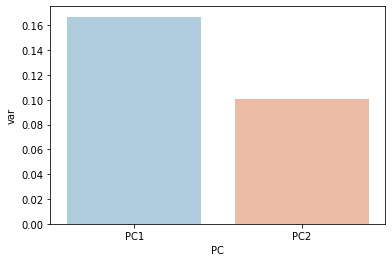

In [27]:
# Subset the skills into a new dataframe
features_df = df[['Status', 'Entre', 'Ope', 'Eng', 'Mark', 'Lead', 'DS', 'BS', 'PM',
       'Sales', 'Domain', 'Law', 'Con', 'Fin', 'Inv']]
features_df = features_df.dropna()
features_df = features_df.reset_index()
features = ['Entre', 'Ope', 'Eng', 'Mark', 'Lead', 'DS', 'BS', 'PM','Sales', 'Domain', 'Law', 'Con', 'Fin', 'Inv']
x = features_df.loc[:, features].values
y = features_df.loc[:,['Status']].values

# Standardize the data
x = StandardScaler().fit_transform(x)

# Run the PCA analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, features_df[['Status']]], axis = 1)
pca.explained_variance_ratio_
pc_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})

# Plot the two components
sns.barplot(x='PC',y="var", 
           data=pc_df, palette='RdBu_r');

The first component explained a little more than 16% of the variance, while the second component explained slightly more than 10% of the variance. Therefore, together the two components only explained about 27% of the variance.

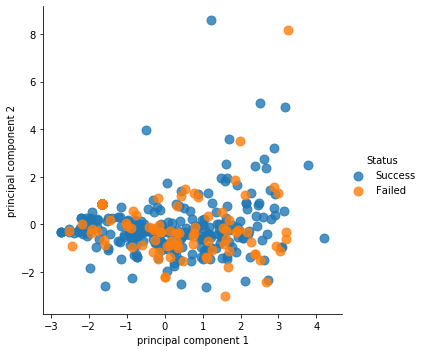

In [28]:
# Plot the relationship between the two components
sns.lmplot(x="principal component 1", y="principal component 2",
  data=finalDf, 
  fit_reg=False, 
  hue='Status', 
  legend=True,
  scatter_kws={"s": 80});

The above graph indicates that there was no siginificant difference in the principle skills between succeed entrepreneurs and failed entrepreneurs.

## 5. Linear Regression Model of the Relationships between Characteristics of the Founders & Co-Founders and the Amount of Funding they Attracted

In [29]:
# Subset various experiences of Founders & Co-Founders (e.g., worked in top companies, startups, Big-5, 
# consulting companies in the past)
cols_to_transform = ["WT", "SP", "WS", "WSS", "Big5", "ECon", "Expo"]

# Create dummy variables
df_with_dummies = pd.get_dummies(df, columns = cols_to_transform )
df_with_dummies = df_with_dummies.dropna()

In [30]:
# The characteristics used as independent variables in the linear regression model include the experiences and 
# skills of the entrepreneurs 
X = df_with_dummies[['WT_Yes', 'SP_Large', 'SP_Medium', 'SP_Small', 'WS_Yes', 'WSS_Yes', 'Big5_Yes', 'ECon_Yes', 
                     'Expo_Yes', "Ex100", "Ex500", "Ex1000", "Entre", "Ope", "Eng", "Mark", "Lead", "DS", "BS", 
                     "PM", "Sales", "Domain", "Law", "Con", "Fin", "Inv"]].values  

# The dependent variable is the amount of funding
Y = df_with_dummies['FoundingAmount'].values

# Generate the linear regression model
regr = LinearRegression()  
regr.fit(X, Y)  

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 9314340.961572535
Coefficients: 
 [-6.98871301e+05 -8.68482675e+06  8.74682111e+06 -2.37554541e+06
 -4.19543925e+06 -8.51925017e+06 -2.79396772e-09 -1.09076771e+07
  5.47048579e+06  1.15907187e+07 -5.74155586e+05 -6.46518837e+05
  5.01316978e+05  3.45139835e+06  3.18139309e+05 -5.33076978e+05
 -1.83184123e+06 -3.15350851e+05 -1.05761707e+06 -4.23500388e+05
  2.48409340e+06 -6.24554804e+05  0.00000000e+00 -5.20158816e+06
  2.89222673e+06  2.39651838e+06]


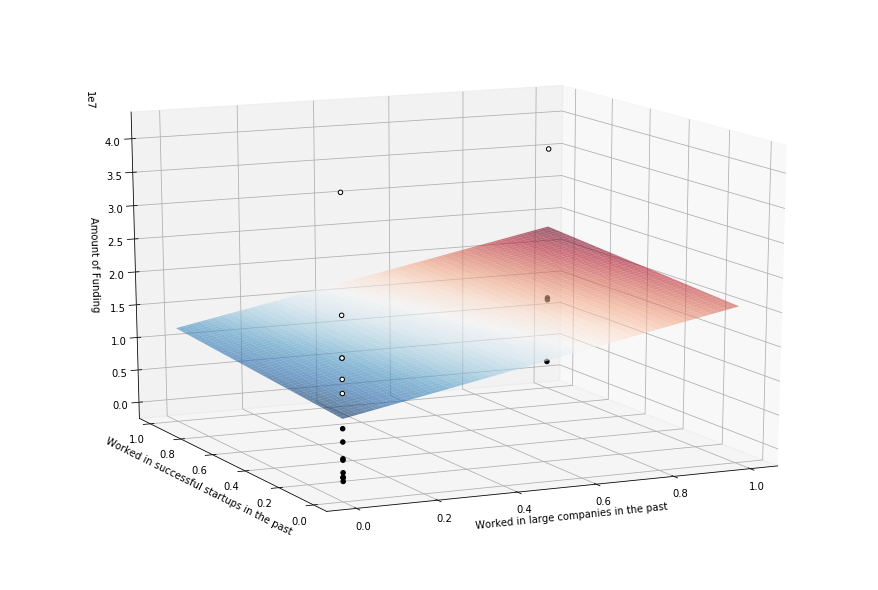

In [31]:
# Because it is very hard to visualize all the relationships between independent and dependent variables, 
# below I selected two predictor variables that relatively stronger relationships with the response variable
# and plot their relationships in a 3D plot

X = df_with_dummies[['SP_Large', "WSS_Yes"]]
y = df_with_dummies['FoundingAmount']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
xx1, xx2 = np.meshgrid(np.linspace(X.SP_Large.min(), X.SP_Large.max(), 100), 
                       np.linspace(X.WSS_Yes.min(), X.WSS_Yes.max(), 100))
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].SP_Large, X[resid >= 0].SP_Large, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].WSS_Yes, X[resid < 0].WSS_Yes, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Worked in large companies in the past')
ax.set_ylabel('Worked in successful startups in the past')
ax.set_zlabel('Amount of Funding');

The above 3D plot suggests that the more work experience the entrepreneurs had in large companies and successful startups, the stronger their ability to attract investment.

## 6. Predict the Status of Startups

In [32]:
# Create the dataframe used for logistic regression analysis
# Predictors include the skills of the entrepreneurs
# Outcome variable is the status of the startups (Succeed vs. Failed)
log_skill_df = df[['Status', 'Entre', 'Ope', 'Eng', 'Mark', 'Lead', 'DS', 'BS', 'PM',
       'Sales', 'Domain', 'Law', 'Con', 'Fin', 'Inv']]
cols_to_transform2 = ["Status"]
train = pd.get_dummies(log_skill_df, columns = cols_to_transform2 )
train = train.dropna()
train = train.drop(columns=['Status_Failed'])

# Seperate the training and test datasets
X_train, X_test, y_train, y_test = train_test_split(train.drop('Status_Success',axis=1), 
                                                    train['Status_Success'], test_size=0.30, 
                                                    random_state=101)

In [33]:
feature_list = list(train.iloc[:,0:-1].columns)
feature_list

['Entre',
 'Ope',
 'Eng',
 'Mark',
 'Lead',
 'DS',
 'BS',
 'PM',
 'Sales',
 'Domain',
 'Law',
 'Con',
 'Fin',
 'Inv']

In [34]:
target_list = str(np.unique(list(train.iloc[:,-1])))
target_list

'[0 1]'

### 6.1 Logistic Regression

In [35]:
# Fit the logistic regression model using the training dataset
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# Test the accuracy of the model using the testing dataset
predictions_log = logmodel.predict(X_test)

print(classification_report(y_test,predictions_log))
print("Accuracy:",metrics.accuracy_score(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.38      0.09      0.15        33
           1       0.74      0.95      0.83        91

    accuracy                           0.72       124
   macro avg       0.56      0.52      0.49       124
weighted avg       0.64      0.72      0.65       124

Accuracy: 0.717741935483871


### 6.2 Regression Tree

In [36]:
clf = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(193.15384615384616, 190.26, 'X[5] <= 5.637\ngini = 0.389\nsamples = 287\nvalue = [76, 211]'),
 Text(103.01538461538462, 135.9, 'X[0] <= 13.696\ngini = 0.46\nsamples = 190\nvalue = [68, 122]'),
 Text(51.50769230769231, 81.53999999999999, 'X[6] <= 20.249\ngini = 0.48\nsamples = 162\nvalue = [65, 97]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.449\nsamples = 129\nvalue = [44, 85]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.463\nsamples = 33\nvalue = [21, 12]'),
 Text(154.52307692307693, 81.53999999999999, 'X[8] <= 23.611\ngini = 0.191\nsamples = 28\nvalue = [3, 25]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.137\nsamples = 27\nvalue = [2, 25]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(283.2923076923077, 135.9, 'X[0] <= 29.911\ngini = 0.151\nsamples = 97\nvalue = [8, 89]'),
 Text(257.53846153846155, 81.53999999999999, 'X[7] <= 18.824\ngini = 0.135\nsamples = 96\nvalue = [7, 89]'),
 Tex

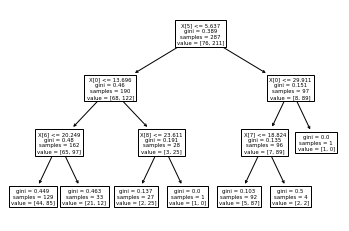

In [37]:
tree.plot_tree(clf) 

In [85]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Startup") 

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                       feature_names=iris.feature_names,  
                       class_names=iris.target_names,  
                       filled=True, rounded=True,  
                       special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### 6.2 Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, oob_score = True)
# Train the model on training data
rf.fit(X_train, y_train);

In [8]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions_rf - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.34 degrees.


In [12]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.740 (0.042)


The accuracy rate (73.8%) of the logistic model is relatively high, meaning that the skills of entrepreneurs are good indicators of the probability of success or failure of their startups.

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_rf.round())
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.0723
Mean accuracy score: 0.726


In [10]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
test_score = r2_score(y_test, predictions_rf)
spearman = spearmanr(y_test, predictions_rf)
pearson = pearsonr(y_test, predictions_rf)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.0723
Test data R-2 score: 0.012
Test data Spearman correlation: 0.235
Test data Pearson correlation: 0.233


In [11]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, predictions_rf.round()),
    columns=['Predicted Success', 'Predicted Failure'],
    index=['True Success', 'True Failure']
)

,Predicted Success,Predicted Failure
True Success,7,26
True Failure,8,83


In [14]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [59]:
feature_list = list(train.iloc[:,0:-1].columns)

In [46]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

TypeError: cannot unpack non-iterable Dot object

In [49]:
from sklearn.tree import plot_tree

In [ ]:
a = plot_tree(clf, 
              feature_names=breast_cancer.feature_names, 
              class_names=breast_cancer.target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [62]:
# Extract single tree
estimator = rf.estimators_[5]



In [63]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = train.,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

NameError: name 'iris' is not defined

In [69]:
estimator = rf.estimators_[5]
estimator

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1201263687, splitter='best')

In [67]:
target_list = list(train.iloc[:,-1])
target_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [70]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree_limited.dot', 
                feature_names = feature_list,
                class_names = target_list,
                rounded = True, proportion = False, precision = 2, filled = True)

In [73]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

/bin/sh: dot: command not found


In [76]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

In [77]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [48]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

ValueError: 'temp_1' is not in list

In [47]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

NameError: name 'importances' is not defined

## 7. Conclusion

Creating a successful startup is a tremendous job, but it is not a mystery. Some major takeaways from this analysis include (1) Start a new business when few of others are doing this. Data show that when there are few startups around, investors actually invest more; (2) The United States is the best place to start your own business; (3) Hone your skills in as many as areas as possible. Although not all skills bring in more funding, they are highly related to the success of your business; (4) If you'd like investors to give you more money, accumulate work experience in large and successful startups; (5) Assemble a large and highly skilled senior leadership team; (6) Attend tie 1 colleges. Although this does not assure success, your diploma from distinguished universities will bring in more funding; (7) Earn a Ph.D. if possible, which is associated with the highest succeess rate; (8) Choose majors such as Business Management and Computer Science in college if you'd like become a entrepreneur in the near future.

## 8. References

Chan, J. (2019). 28 Successful Founders Share Their Advice on How To Start a Startup. Retrieved from https://foundr.com/how-to-start-a-startup

Light, J. (2019). The 25 Most Important Entrepreneurs of the Past 25 Years. Retrieved from https://www.worth.com/25-entrepreneurs-25-years/

Startup Analysis. (2019). Retrieved from  https://www.kaggle.com/ajaygorkar/startup-analysis

## 9. Online Access of the Analysis Results

The results of this analysis is published on 

(1) Github: 

Github Page: https://bin-gw.github.io/DataMining_Project3_Bin/

Code Repositary: https://github.com/Bin-GW/DataMining_Project3_Bin

(2) Zenodo: 

Bin Xing. (2019, December). DATS 6103 - Individual Project 3 - Bin Xing. Zenodo. http://doi.org/10.5281/zenodo.3572494